Riesgo de incendio estimado: 81.43%


c:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


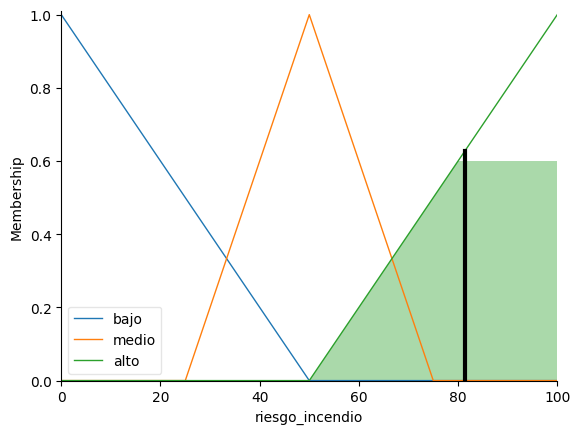

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperatura = ctrl.Antecedent(np.arange(0, 41, 1), 'temperatura')
humedad = ctrl.Antecedent(np.arange(0, 101, 1), 'humedad')
riesgo_incendio = ctrl.Consequent(np.arange(0, 101, 1), 'riesgo_incendio')

temperatura['baja'] = fuzz.trimf(temperatura.universe, [0, 0, 20])
temperatura['media'] = fuzz.trimf(temperatura.universe, [10, 20, 30])
temperatura['alta'] = fuzz.trimf(temperatura.universe, [20, 40, 40])

humedad['seca'] = fuzz.trimf(humedad.universe, [0, 0, 50])
humedad['media'] = fuzz.trimf(humedad.universe, [25, 50, 75])
humedad['humeda'] = fuzz.trimf(humedad.universe, [50, 100, 100])

riesgo_incendio['bajo'] = fuzz.trimf(riesgo_incendio.universe, [0, 0, 50])
riesgo_incendio['medio'] = fuzz.trimf(riesgo_incendio.universe, [25, 50, 75])
riesgo_incendio['alto'] = fuzz.trimf(riesgo_incendio.universe, [50, 100, 100])

regla1 = ctrl.Rule(temperatura['alta'] & humedad['seca'], riesgo_incendio['alto'])
regla2 = ctrl.Rule(temperatura['media'] & humedad['seca'], riesgo_incendio['medio'])
regla3 = ctrl.Rule(temperatura['baja'] | humedad['humeda'], riesgo_incendio['bajo'])

sistema_riesgo_ctrl = ctrl.ControlSystem([regla1, regla2, regla3])
sistema_riesgo = ctrl.ControlSystemSimulation(sistema_riesgo_ctrl)

sistema_riesgo.input['temperatura'] = 35
sistema_riesgo.input['humedad'] = 20

sistema_riesgo.compute()

print(f"Riesgo de incendio estimado: {sistema_riesgo.output['riesgo_incendio']:.2f}%")

riesgo_incendio.view(sim=sistema_riesgo)
